In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("AAPL ^VIX", start ="2020-03-01", end="2021-03-01")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                 Close                  High             \
                 AAPL       ^VIX       AAPL       ^VIX       AAPL       ^VIX   
Date                                                                           
2020-03-02  74.127892  33.419998  74.702499  33.419998  75.360001  40.410000   
2020-03-03  71.773636  36.820000  72.330002  36.820000  76.000000  41.060001   
2020-03-04  75.102829  31.990000  75.684998  31.990000  75.849998  35.580002   
2020-03-05  72.666725  39.619999  73.230003  39.619999  74.887497  42.840000   
2020-03-06  71.701706  41.939999  72.257500  41.939999  72.705002  54.389999   

                  Low                  Open                Volume       
                 AAPL       ^VIX       AAPL       ^VIX       AAPL ^VIX  
Date                                                                    
2020-03-02  69.430000  31.500000  70.570000  38.540001  341397200    0  
2020-03-03  71.449997  24.930000  75.917503  33.650002  319475600    0  
2020-03-04  73.282501  30.299999  74.110001  34.439999  219178400    0  
2020-03-05  72.852501  33.540001  73.879997  33.610001  187572800    0  
2020-03-06  70.307503  40.840000  70.500000  48.930000  226176800    0

In [5]:
initial_data['Adj Close'].head()

,AAPL,^VIX
Date,,
2020-03-02,74.127892,33.419998
2020-03-03,71.773636,36.820000
2020-03-04,75.102829,31.990000
2020-03-05,72.666725,39.619999
2020-03-06,71.701706,41.939999


In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [7]:
data.head()

,AAPL,^VIX
Date,,
2020-03-02,74.127892,33.419998
2020-03-03,71.773636,36.820000
2020-03-04,75.102829,31.990000
2020-03-05,72.666725,39.619999
2020-03-06,71.701706,41.939999


In [8]:
data.tail()

,AAPL,^VIX
Date,,
2021-02-22,126.000000,23.450001
2021-02-23,125.860001,23.110001
2021-02-24,125.349998,21.340000
2021-02-25,120.989998,28.889999
2021-02-26,121.260002,27.950001


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

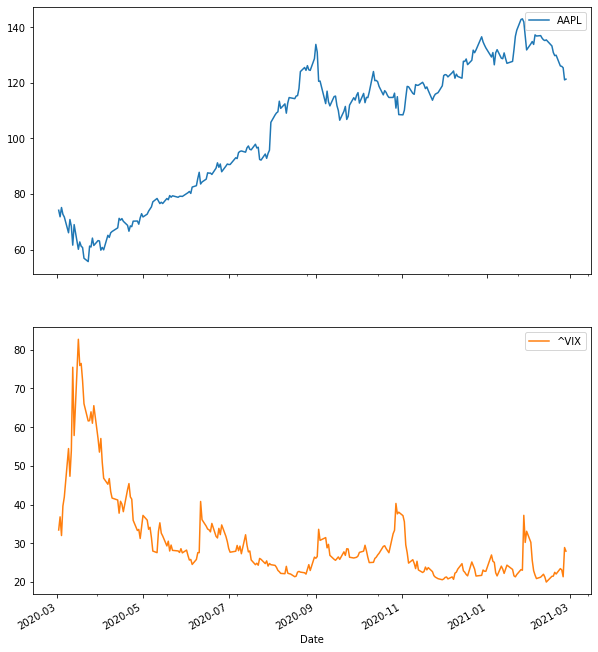

In [9]:
data.plot(figsize=(10, 12), subplots=True)

In [10]:
data.describe().round(2)

,AAPL,^VIX
count,251.00,251.00
mean,103.37,30.47
std,24.00,11.23
min,55.66,19.97
25%,79.73,23.22
50%,112.37,26.97
75%,122.65,33.07
max,142.95,82.69


In [11]:
data.diff().head()

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-2.354256,3.400002
2020-03-04,3.329193,-4.830000
2020-03-05,-2.436104,7.629999
2020-03-06,-0.965019,2.320000


In [12]:
data.diff().describe().round(2)

,AAPL,^VIX
count,250.00,250.00
mean,0.19,-0.02
std,2.69,3.66
min,-10.49,-17.64
25%,-1.09,-1.37
50%,0.15,-0.30
75%,1.71,0.90
max,10.02,24.86


In [13]:
data.pct_change().round(4).head()

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0318,0.1017
2020-03-04,0.0464,-0.1312
2020-03-05,-0.0324,0.2385
2020-03-06,-0.0133,0.0586


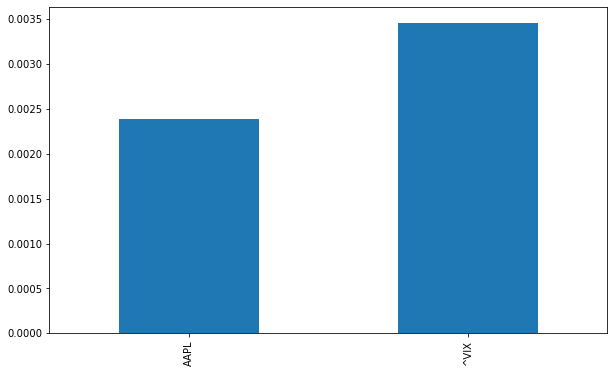

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0323,0.0969
2020-03-04,0.0453,-0.1406
2020-03-05,-0.0330,0.2139
2020-03-06,-0.0134,0.0569


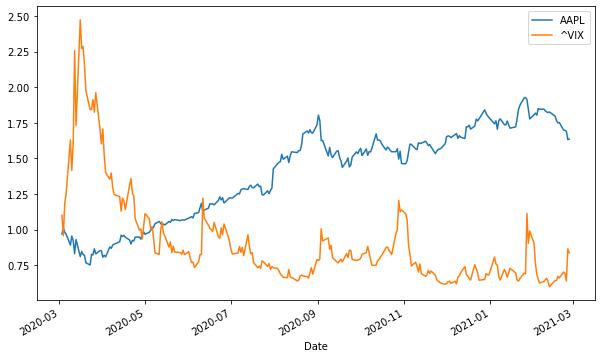

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [19]:
data.resample('1w', label='right').last().head()

,AAPL,^VIX
Date,,
2020-03-08,71.701706,41.939999
2020-03-15,68.957970,57.830002
2020-03-22,56.869179,66.040001
2020-03-29,61.458603,65.540001
2020-04-05,59.888275,46.799999


In [20]:
data.resample('1m', label='right').last().head()

,AAPL,^VIX
Date,,
2020-03-31,63.083504,53.540001
2020-04-30,72.885025,34.150002
2020-05-31,79.087120,27.510000
2020-06-30,90.743469,30.430000
2020-07-31,105.728088,24.459999


<AxesSubplot:xlabel='Date'>

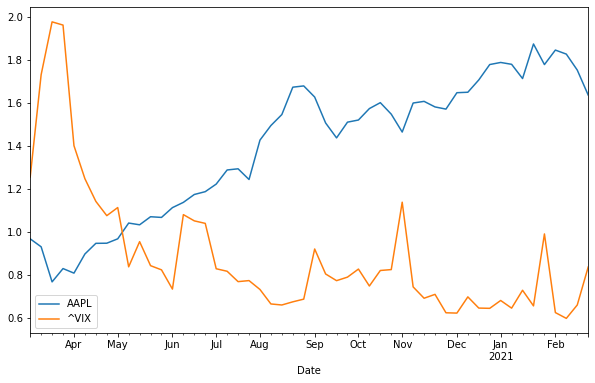

In [21]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

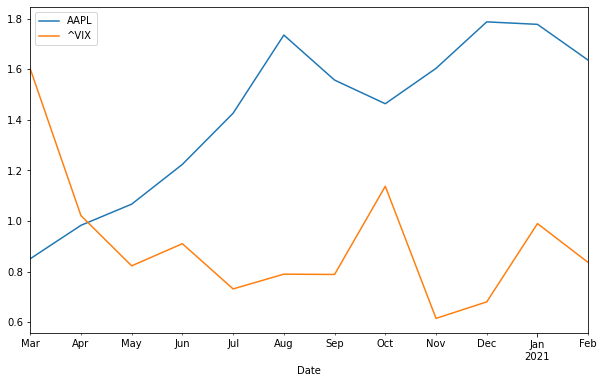

In [32]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [23]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2021-02-22,126.000000
2021-02-23,125.860001
2021-02-24,125.349998
2021-02-25,120.989998
2021-02-26,121.260002


In [24]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma
Date,,,,,,,
2020-03-13,68.957970,61.580158,70.105573,4.045155,71.244003,75.102829,67.560959
2020-03-16,60.086731,60.086731,68.701457,4.850570,69.872135,75.102829,61.955287
2020-03-17,62.728752,60.086731,67.796968,5.053119,68.642914,75.102829,62.535386
2020-03-18,61.193157,60.086731,66.406001,4.722205,67.179256,72.666725,61.528714
2020-03-19,60.724293,60.086731,65.211758,4.466119,64.379704,71.701706,60.925398


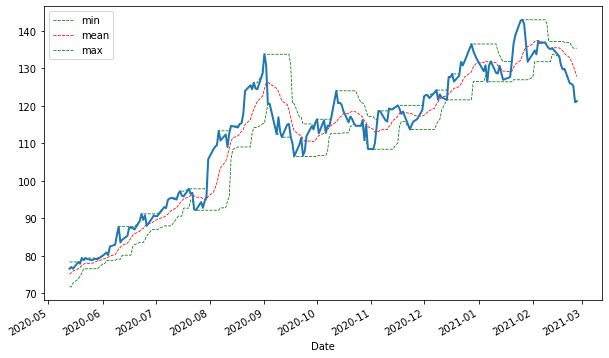

In [25]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [26]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2021-02-22,126.000000,135.049167,129.851951
2021-02-23,125.860001,134.206829,130.032982
2021-02-24,125.349998,133.327009,130.191201
2021-02-25,120.989998,132.284107,130.267434
2021-02-26,121.260002,131.502835,130.307227


<AxesSubplot:xlabel='Date'>

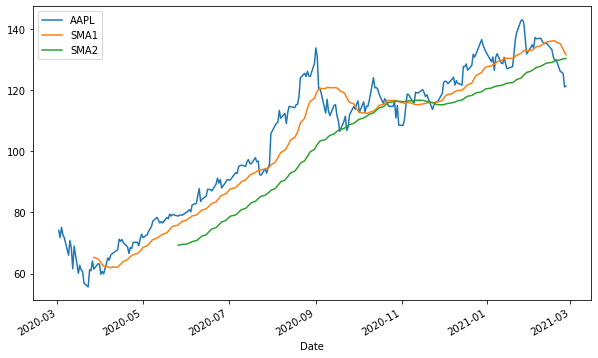

In [27]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

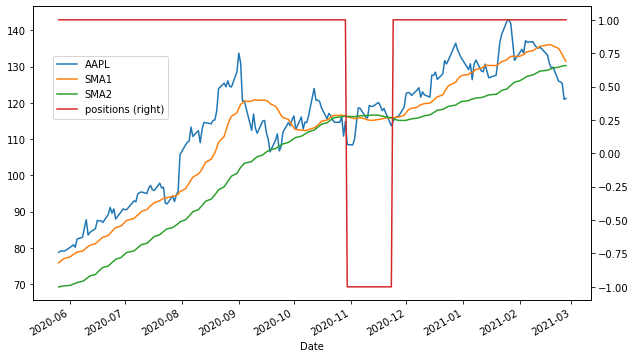

In [28]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [64]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-05-07')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210507P00085000,2021-03-29 17:18:23,85.0,0.20,0.17,0.21,0.000000,0.000000,18,3,0.557622,False,REGULAR,USD
1,AAPL210507P00095000,2021-03-29 17:26:59,95.0,0.37,0.34,0.38,0.000000,0.000000,92,7,0.463384,False,REGULAR,USD
2,AAPL210507P00100000,2021-03-29 17:41:56,100.0,0.54,0.52,0.54,-0.160000,-22.857138,647,73,0.416021,False,REGULAR,USD
3,AAPL210507P00105000,2021-03-29 17:13:44,105.0,0.86,0.83,0.86,-0.060000,-6.521739,40,46,0.379157,False,REGULAR,USD
4,AAPL210507P00107000,2021-03-29 17:49:51,107.0,1.03,1.02,1.06,-0.320000,-23.703709,75,196,0.367194,False,REGULAR,USD
5,AAPL210507P00108000,2021-03-29 17:38:45,108.0,1.19,1.14,1.18,-0.350000,-22.727268,30,37,0.361579,False,REGULAR,USD
6,AAPL210507P00109000,2021-03-29 17:38:45,109.0,1.31,1.28,1.32,-0.240000,-15.483871,14,24,0.356696,False,REGULAR,USD
7,AAPL210507P00110000,2021-03-29 17:31:17,110.0,1.54,1.43,1.48,0.210000,15.789468,99,181,0.352301,False,REGULAR,USD
8,AAPL210507P00111000,2021-03-29 17:41:16,111.0,1.65,1.60,1.65,-0.420000,-20.289854,27,47,0.347419,False,REGULAR,USD
9,AAPL210507P00112000,2021-03-29 17:31:17,112.0,1.87,1.80,1.86,-0.620000,-24.899600,42,9,0.344489,False,REGULAR,USD


In [65]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [66]:
data['Adj Close']

Date
2020-03-02     74.127892
2020-03-03     71.773636
2020-03-04     75.102829
2020-03-05     72.666725
2020-03-06     71.701706
                 ...    
2021-02-22    126.000000
2021-02-23    125.860001
2021-02-24    125.349998
2021-02-25    120.989998
2021-02-26    121.260002
Name: Adj Close, Length: 251, dtype: float64

In [67]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.45732933573445084

In [68]:
data = yf.download("AAPL", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [69]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.37784909941441586

In [136]:
S0 = 121             # spot stock price
K = 120               # strike
T = 1/12                 # maturity 
r = 0.0083                 # risk free rate 
sig = 0.46               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [137]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [138]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [139]:
S

array([[121.        , 130.64153681, 141.05133173, 152.2906012 ],
       [  0.        , 112.07002274, 121.        , 130.64153681],
       [  0.        ,   0.        , 103.79909087, 112.07002274],
       [  0.        ,   0.        ,   0.        ,  96.1385659 ]])

In [140]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4823450403177774

In [198]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [200]:
S = mcs_simulation_np(90,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

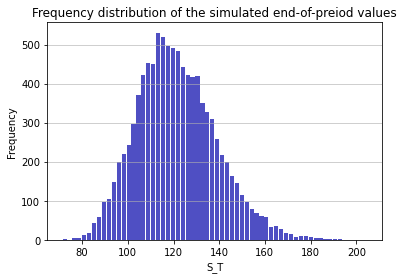

In [201]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [204]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.5001


In [205]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [206]:
data['Adj Close']

Date
2020-03-02     74.127892
2020-03-03     71.773636
2020-03-04     75.102829
2020-03-05     72.666725
2020-03-06     71.701706
                 ...    
2021-02-22    126.000000
2021-02-23    125.860001
2021-02-24    125.349998
2021-02-25    120.989998
2021-02-26    121.260002
Name: Adj Close, Length: 251, dtype: float64

In [207]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.45732933573445084

In [208]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [209]:
T = 1/12
r = 0.0083
sigma = 0.46
S0 = 121
K = 120

In [210]:
S = mcs_simulation_np(1000)

In [211]:
S = np.transpose(S)
S

array([[121.        , 120.93854201, 120.69820695, ..., 143.43719857,
        143.41171561, 143.17630286],
       [121.        , 121.84797882, 121.35870104, ..., 152.56453708,
        152.89314379, 152.89589079],
       [121.        , 121.5082816 , 121.43503135, ..., 114.77148313,
        114.37687414, 114.03019853],
       ...,
       [121.        , 119.9491754 , 119.48273839, ..., 134.34943377,
        134.06775712, 135.22312673],
       [121.        , 121.11983431, 121.85989728, ..., 146.30442851,
        147.22966423, 147.21286958],
       [121.        , 120.480142  , 121.33779122, ..., 111.16789531,
        111.17145374, 111.49667326]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

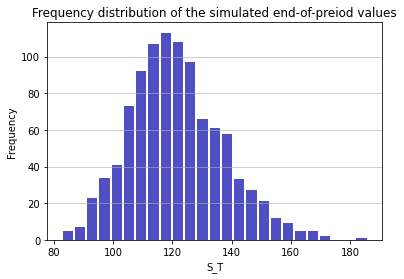

In [212]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [213]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.7932067932067932


In [214]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [215]:
delta(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

-0.44811674136003143

In [216]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

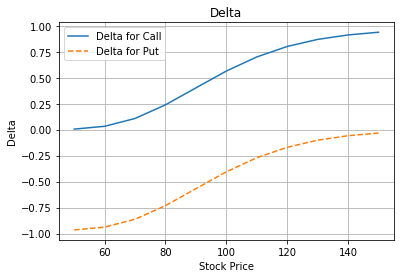

In [217]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [218]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [219]:
gamma(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

0.02460369449451104

In [220]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 121, 1/12, 0.0083, 0.0069, 0.46, 'put')

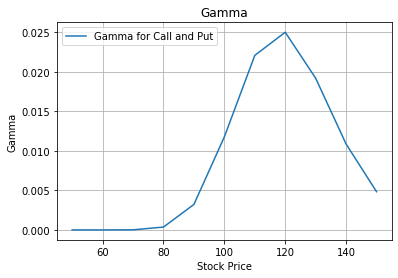

In [221]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [222]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [223]:
speed(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

0.00011607430723121085

In [224]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 121, 1/12, 0.0083, 0.0069, 0.46, 'put')

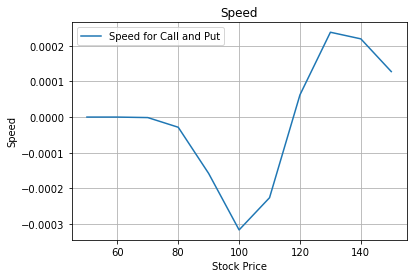

In [225]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [226]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [227]:
theta(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

38.24072998996294

In [230]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(121, 120, T[i], 0.0083, 0.0069, 0.46, 'call')
    Theta_Put [i] = theta(121, 120, T[i], 0.0083, 0.0069, 0.46, 'put')

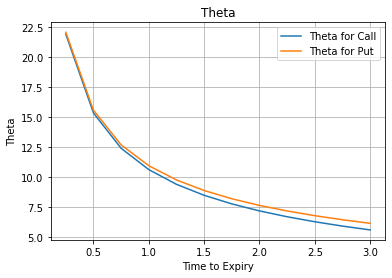

In [231]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [232]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [233]:
rho(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

-5.008587664999891

In [234]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(121, 120, 1/12, r[i], 0.0069, 0.46, 'call')
    Rho_Put [i] = rho(121, 120, 1/12, r[i], 0.0069, 0.46, 'put')

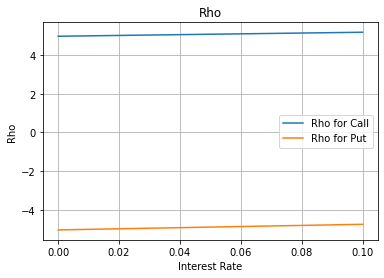

In [235]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [236]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [237]:
vega(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

13.81014758184436

In [238]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(121, 120, 1/12, 0.0083, 0.0069, vol[i], 'put')

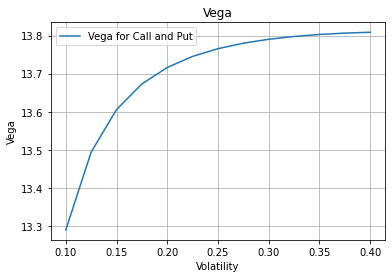

In [239]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])